In [1]:
# Manually Finding the slpoe
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

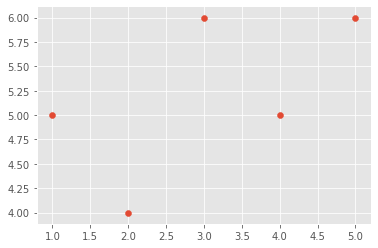

In [2]:
xs = [1,2,3,4,5]
ys = [5,4,6,5,6]
plt.scatter(xs,ys)
plt.show()

In [3]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

In [4]:
# Formula = m = [mean(x)*mean(y) - mean(x*y)] / [{mean(x)}^2 -mean[{x}^2]]

In [5]:


xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

m = best_fit_slope(xs,ys)
print(m)

0.29999999999999893


In [6]:
#Video 9 - Programming the  best fit line

# b0 =[ ybar - mx]

from statistics import mean
import numpy as np

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.29999999999999893 4.300000000000003


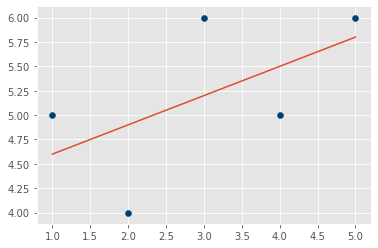

In [7]:
regression_line = [(m*x)+b for x in xs]

regression_line = []
for x in xs:
    regression_line.append((m*x)+b)
    
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()    

6.399999999999996


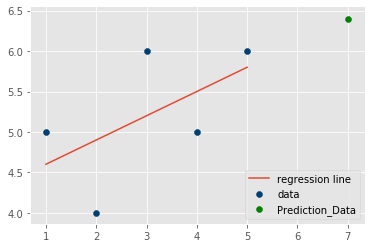

In [8]:
# Predict for x=7
predict_x = 7
predict_y = (m*predict_x)+b
print(predict_y)


plt.scatter(xs,ys,color='#003F72',label='data')
plt.scatter(predict_x,predict_y,color='g',label='Prediction_Data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()


In [9]:
# Manually doing r-squared
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))
# ys_line = regressed line
#  ys_orig = orig. values 

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

#Above definig it
#  Below Actually Implementing it

    
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)


0.3214285714285714


In [10]:
import random
def create_dataset(hm,variance,step=2,correlation=False):

    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

0.463147828366


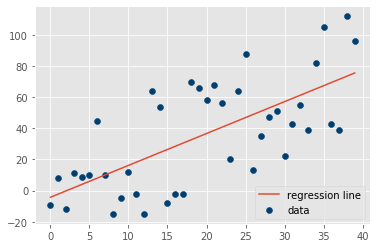

In [11]:
# Creating a random dataset and regressing on it
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

xs, ys = create_dataset(40,40,2,correlation='pos')
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

### Applyng K-means clustering 

In [15]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('C:/Users/HP/Desktop/Data Science/Data/breast_cancer.csv')
df.replace('?',-99999, inplace=True)
df.drop(['number'], 1, inplace=True)

df.head()
#2- bengin 
#4- malignant

,clump_thickness,uniformity_csize,uniformity_cshape,marg_adhension,single_cell_size,nuclei,chromatin,nuclei.1,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [16]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

1.0


In [17]:
# Predicting on the 9 variables
example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [18]:
example_measures

array([[4, 2, 1, 1, 1, 2, 3, 2, 1]])

In [19]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]
